In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [ ]:
df = pd.read_csv('../data/water-treatment.data', header=None, index_col=0,na_values='?').astype(np.float64) #Es un csv


In [ ]:
df #Plantas de tratamiento de agua

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894.0,7.7,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988.0,7.8,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060.0,7.5,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0


In [ ]:
df.shape

(527, 38)

In [ ]:
df.fillna(df.mean(), inplace=True) #Llenamos con la media

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_std=False) #No necesariamente la varianza esta nula con with_std
# Medidas de similitud deben de estar escaladas, para poder medir, es a conveniencia dado por los datos
sdf = ss.fit_transform(df)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=1000) #dim 2, perplexity vecinos que estimamos
data_tsne = tsne.fit_transform(sdf)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

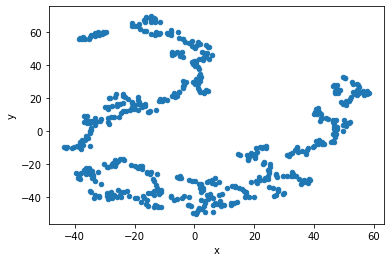

In [ ]:
df_tsne.plot.scatter('x','y')



In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering #Clauster anglomerativo

from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, dendrogram



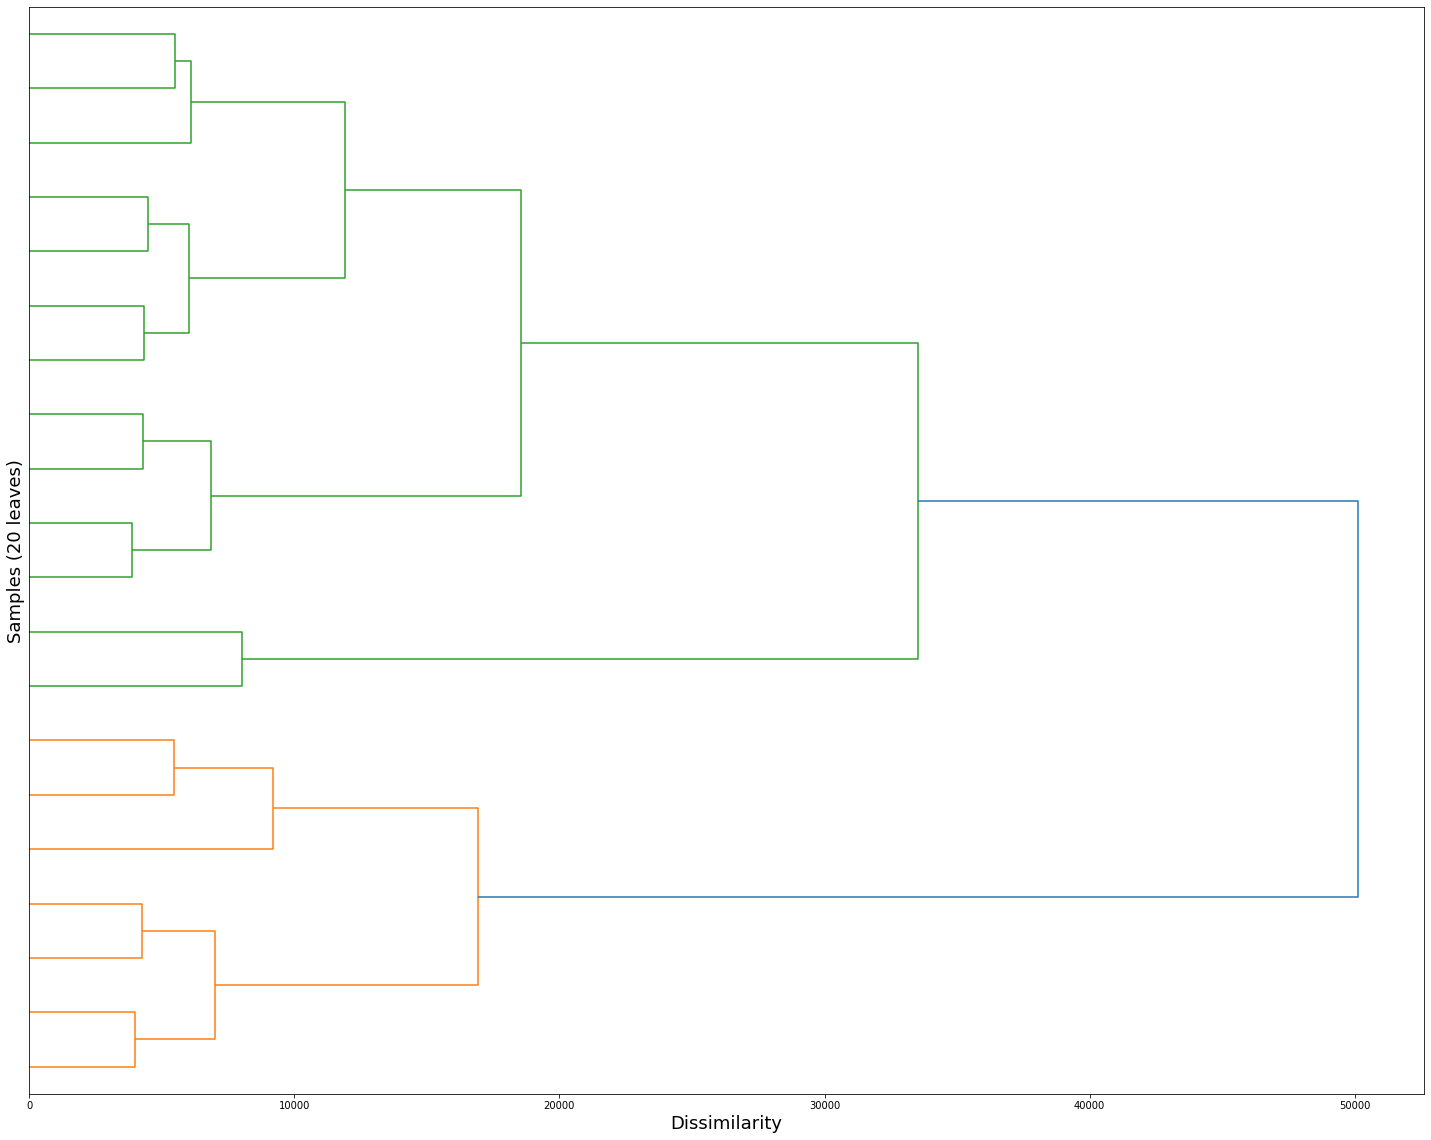

In [ ]:
dm = pdist(sdf, metric='euclidean')
Z = linkage(dm, method='complete') #Metodo completo

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (20 leaves)', fontsize=18)

plt.show()
#El denograma ya tiene mas datos por lo cual con p=20 vamos a tener solo 20 hojas

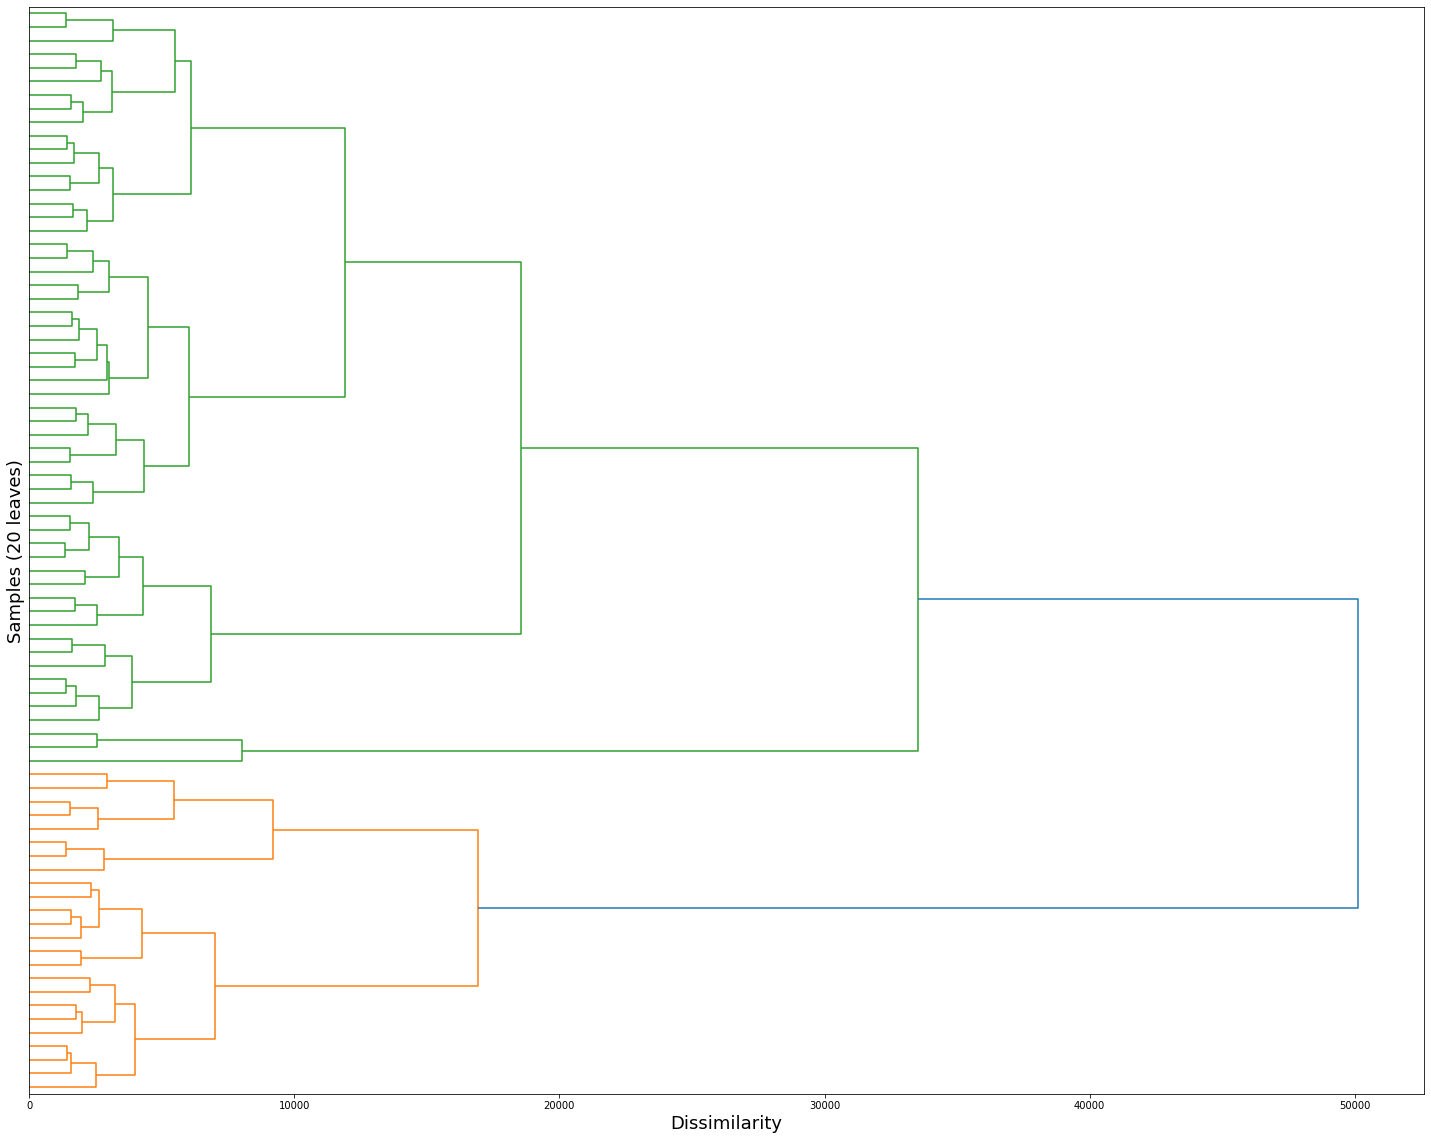

In [ ]:
dm = pdist(sdf, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=80, no_labels=True, ax=ax)

#Muestra 80 hojas, con un denograma es una guia aunque con mas datos es mas complejo


ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (20 leaves)', fontsize=18)

plt.show()

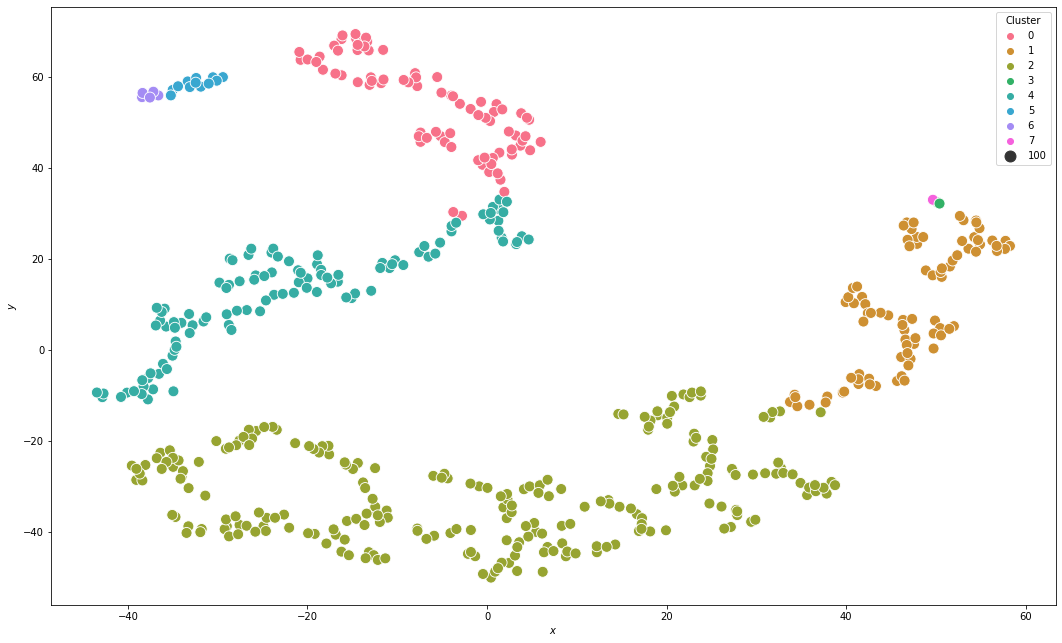

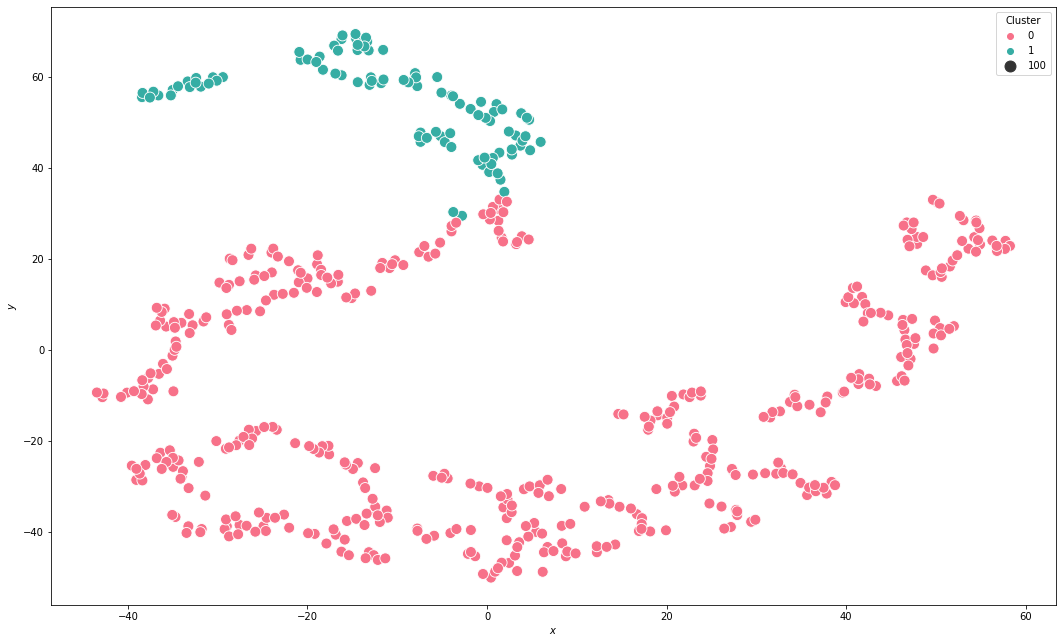

In [ ]:
for n in (8, 2,6,5):
  #Probamos con 8 y 2 grupos
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete') #Llamamos al clauster anglomerativo
    #affinity mediciones de las metricas, ward es forzoso euclideana
    Y_pred = ag.fit_predict(sdf) #Pasamos nuestro conjunto de datos estandarizado

    df_pred = pd.Series(Y_pred, name='Cluster', index=df.index)
    pdff = pd.concat([dff, df_pred], axis=1)

    fig, ax = plt.subplots(figsize=(18, 11))
    sns.scatterplot(x='x',
                    y='y',
                    hue='Cluster',
                    size=100,
                    
                    sizes=(120, 120),
                    palette=sns.color_palette("husl", n),
                    data=pdff,
                    ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()
        
#Posiblemente es mejor usar los 6
#Los dos puntos que forman un clauster no es buena señal
#Las variables pueden ser enmascaradas 
#Falta ver las caracteristicas de los grupos 
#Se recomienda guardar los cluster cuando es bueno
#Una estrategia es re clusterizar
#Para distancia se recomienda mas minmax que standard (en tsne)
    